## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

**Answer:**
1. Is there a relationship between gender and left-handedness? 
2. If one responds more strongly that they are happiest when they are in their beds (Q10), how does the likelihood they are left-handed change?
3. If one responds more strongly that they cry when they get angry (Q20), how does the likelihood they are left-handed change?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

**Imports:**

In [1]:
import pandas as pd
#https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in 'data.csv'
df = pd.read_csv('data.csv', delimiter = '\\t')
df.head()

<ipython-input-2-90e695540822>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data.csv', delimiter = '\\t')


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,11,6774,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,14,1072,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,10,226,US,2,1,22,3,1,1,3,2,3


In [3]:
df.info()
#no null values from 'Non-Null Count'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

**Answer:**
1. One would have to consider how the survey is being administered in order to protect a respondent's identity.
2. Along with protecting a respondent's identity, one would need to be conscience of the population being surveyed so that the results are representative of a true population.
3. Lastly, when it comes to these types of surveys, an individual could misrepresent themselves, like lie about their age or orientation. I don't know how one would account for that, however. 

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
df_qs = df.drop(columns = ['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion'])
df_qs.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,3


<ipython-input-5-20833ccce33a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trimask = np.triu(np.ones(corr_df.shape)).astype(np.bool)


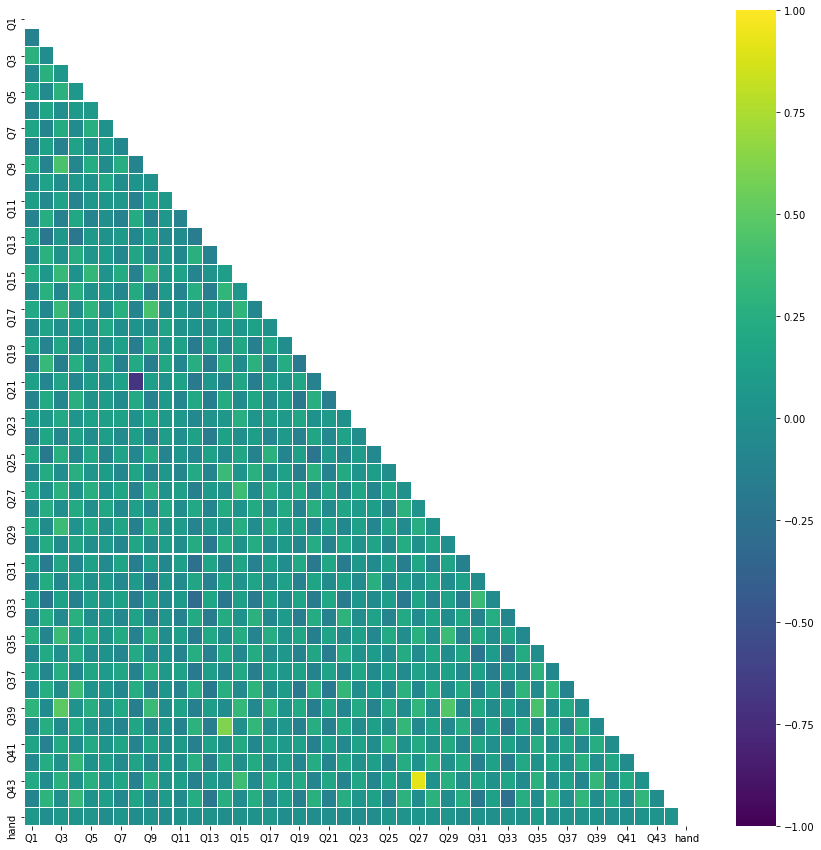

In [5]:
#https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
corr_df =  df_qs.corr(method='pearson')
trimask = np.triu(np.ones(corr_df.shape)).astype(np.bool)

plt.figure(figsize = (15, 15))
sns.heatmap(df_qs.corr(), vmin = -1, vmax = 1, 
            linewidths = 0.05, cmap = 'viridis',
            xticklabels = 2, yticklabels = 2, mask = trimask);

- Very strong negative correlation between Q21 and Q8:</br>
    Q21: 'I do not remember birthdays.'</br>
    Q8: 'I know the birthdays of my friends.'</br>
</br>
- Very strong positive correlation between Q43 and Q27:</br>
    Q43: 'I think a natural disaster would be kind of exciting.'</br>
    Q27: 'I think a natural disaster would be kind of exciting.'</br>
    - These are duplicates of one another so this strong correlation makes sense.

In [6]:
#for ease of reference
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [7]:
#value counts for country
df['country'].value_counts()

US    2468
GB     382
CA     216
DE     152
AU     124
      ... 
VI       1
VN       1
KW       1
DZ       1
SA       1
Name: country, Length: 94, dtype: int64

In [8]:
#unique countries represented
df['country'].unique()

array(['US', 'CA', 'NL', 'GR', 'GB', 'KR', 'SE', 'NO', 'DE', 'NZ', 'CH',
       'RO', 'IL', 'IN', 'ZA', 'TR', 'JM', 'AU', 'BE', 'PL', 'CZ', 'RS',
       'TW', 'A2', 'MX', 'PH', 'ES', 'AT', 'JP', 'IT', 'SG', 'MY', 'HK',
       'FR', 'EU', 'DK', 'AE', 'EC', 'TH', 'IE', 'PK', 'BR', 'ID', 'EG',
       'NI', 'FI', 'CN', 'RU', 'SI', 'AR', 'PT', 'LB', 'DO', 'PF', 'LT',
       'BG', 'GE', 'CL', 'SK', 'EE', 'KE', 'UZ', 'LV', 'BB', 'BN', 'PR',
       'HR', 'NP', 'A1', 'PE', 'UA', 'HU', 'VN', 'TZ', 'KH', 'UY', 'VE',
       'IS', 'MP', 'CO', 'JO', 'TN', 'KW', 'CY', 'FJ', 'LK', 'VI', 'ZW',
       'IM', 'ZM', 'QA', 'DZ', 'LY', 'SA'], dtype=object)

In [9]:
#practicing with getting dummies on object values
country_dummies = pd.get_dummies(df['country'], drop_first = True)
country_dummies.head()

,A2,AE,AR,AT,AU,BB,BE,BG,BN,BR,CA,CH,CL,CN,CO,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,EU,FI,FJ,FR,GB,GE,GR,HK,HR,HU,ID,IE,IL,IM,IN,IS,IT,JM,JO,JP,KE,KH,KR,KW,LB,LK,LT,LV,LY,MP,MX,MY,NI,NL,NO,NP,NZ,PE,PF,PH,PK,PL,PR,PT,QA,RO,RS,RU,SA,SE,SG,SI,SK,TH,TN,TR,TW,TZ,UA,US,UY,UZ,VE,VI,VN,ZA,ZM,ZW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [10]:
#value counts for fromgoogle
df['fromgoogle'].value_counts()

2    2411
1    1773
Name: fromgoogle, dtype: int64

In [11]:
#getting dummies for fromgoogle
df['fromgoogle'] = pd.get_dummies(df['fromgoogle'], drop_first = True)
df['fromgoogle'].head(3)

0    1
1    1
2    1
Name: fromgoogle, dtype: uint8

In [12]:
#value counts for engnat
df['engnat'].value_counts()

#'0' is not explained in the codebook.txt, is is a non-response?

1    3130
2    1029
0      25
Name: engnat, dtype: int64

In [13]:
#getting dummies for engnat
engnat_dummies = pd.get_dummies(df['engnat'], drop_first = True)
engnat_dummies.head(3)

,1,2
0,1,0
1,1,0
2,0,1


In [14]:
#https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts
#for information on .sort_index()

#getting ordered value counts for age
df['age'].value_counts().sort_index()

#note, there are three ages 123, 409, 23763

13        21
14        81
15       190
16       329
17       357
        ... 
85         1
86         2
123        1
409        1
23763      1
Name: age, Length: 66, dtype: int64

- While I'm not saying a person who's 123 couldn't ride a bicycle, the oldest competitve cyclist ever was 105: </br> https://en.wikipedia.org/wiki/Robert_Marchand_(cyclist) </br> It's likely the entry 123 is erroneous so I'm going to replace it and the other two high 'age' values with either the mean or median to reduce any issues from the high integer values. 

In [15]:
#displaying the column age where age >= 123, only three entries:
df[['age']][df['age'] >= 123]

,age
2075,123
2137,409
2690,23763


In [16]:
#dropping the above three entries to build a df from which to get mean/median
df_for_age_avg = df.drop(index = [2075, 2137, 2690])

In [17]:
round(df_for_age_avg['age'].mean())

25

In [18]:
df_for_age_avg['age'].median()

21.0

In [19]:
#I've arbitrarily decided to go with mean, replacing the indexes 
#2075, 2137, 2690 from the original df with the mean, 25
df.loc[[2075, 2137, 2690], 'age'] = 25

In [20]:
#checking that the ages were replaced:

df['age'].loc[2075]
#df['age'].loc[2137]
#df['age'].loc[2690]

25

In [21]:
#getting ordered value counts for education
df['education'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0      51
1     546
2    2055
3    1086
4     446
Name: education, dtype: int64

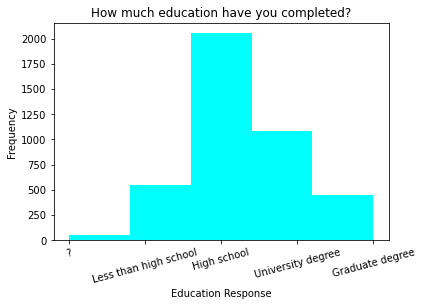

In [22]:
#practicing with some plotting
plt.hist(df['education'],
         bins = 5,
         color = 'aqua', 
         align = 'mid');
plt.xticks([0,1,2,3,4], 
           ['?', 'Less than high school',
                       'High school', 'University degree',
                       'Graduate degree'], 
          rotation = 15)
plt.xlabel('Education Response')
plt.ylabel('Frequency')
plt.title("How much education have you completed?");

In [23]:
#getting dummies for education
education_dummies = pd.get_dummies(df['education'], drop_first = True)
education_dummies.head(3)

,1,2,3,4
0,0,0,1,0
1,1,0,0,0
2,0,0,0,1


In [24]:
#getting ordered value counts for gender
df['gender'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0      82
1    1586
2    2212
3     304
Name: gender, dtype: int64

In [25]:
#getting dummies for gender
gender_dummies = pd.get_dummies(df['gender'], prefix = 'gender', drop_first = True)
gender_dummies.head(3)

,gender_1,gender_2,gender_3
0,1,0,0
1,0,1,0
2,1,0,0


In [26]:
#getting ordered value counts for orientation
df['orientation'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0     123
1    2307
2     833
3     335
4     237
5     349
Name: orientation, dtype: int64

In [27]:
#getting dummies for orientation
orientation_dummies = pd.get_dummies(df['orientation'], drop_first = True)
orientation_dummies.head(3)

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0


In [28]:
#getting ordered value counts for race
df['race'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0      66
1     393
2     383
3     168
4      33
5       6
6    2793
7     342
Name: race, dtype: int64

In [29]:
#getting dummies for race
race_dummies = pd.get_dummies(df['race'], drop_first = True)
race_dummies.head(3)

,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0


In [30]:
#getting ordered value counts for race
df['religion'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0     187
1    1857
2    1222
3      80
4      62
5      50
6     103
7     623
Name: religion, dtype: int64

In [31]:
#getting dummies for religion
religion_dummies = pd.get_dummies(df['religion'], drop_first = True)
religion_dummies.head(3)

,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [32]:
#getting ordered value counts for hand
df['hand'].value_counts().sort_index()

#'0' is not explained in the codebook.txt, is is a non-response?

0      11
1    3542
2     452
3     179
Name: hand, dtype: int64

- Since the purpose of this analysis is to determine if personality traits have any impacts on left-handedness, I'm going to drop the rows where the response to 'hand' was '0'.

In [33]:
df.loc[df['hand'] == 0]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
1145,1,5,2,5,3,3,2,4,2,5,2,3,1,5,5,5,1,4,5,5,2,0,5,4,1,3,1,1,1,5,5,5,3,5,1,2,1,3,5,5,3,4,2,3,6380,277,US,0,1,24,2,2,1,6,7,0
1322,1,5,3,3,4,3,2,5,3,2,2,3,1,4,4,3,3,2,3,5,1,4,4,5,4,1,3,5,1,4,5,5,5,5,5,2,1,4,1,2,5,4,3,3,36,309,US,1,1,34,3,0,0,0,1,0
1846,1,1,1,2,1,1,3,3,1,4,1,1,3,1,1,1,1,3,5,1,3,1,3,4,1,1,1,4,1,1,4,5,5,4,1,3,1,3,1,1,3,1,1,1,44,185,NO,1,2,34,4,2,1,6,2,0
2081,2,4,2,0,5,3,4,2,4,5,1,1,5,4,2,3,1,5,2,2,4,5,4,2,1,3,1,1,2,3,3,1,5,2,4,1,2,3,3,1,3,1,1,1,4,153,HK,0,2,21,3,2,1,2,2,0
2409,5,1,5,3,4,3,3,4,5,3,3,2,5,2,5,2,5,3,5,1,2,3,5,3,3,4,2,1,2,1,2,1,2,2,4,3,4,2,5,2,5,2,5,3,5,249,US,1,2,18,2,1,0,7,7,0
2471,1,5,1,5,5,5,1,5,1,3,3,3,5,5,5,5,1,5,3,5,1,5,1,1,1,5,1,5,1,5,1,5,1,1,5,1,5,1,5,5,5,5,1,5,6,200,CA,0,1,22,3,0,1,6,2,0
2690,2,5,5,1,5,5,5,5,4,2,1,1,1,5,4,5,5,1,1,5,1,5,4,2,5,5,5,4,5,1,5,1,5,1,5,1,4,3,5,4,5,4,5,2,16,330,US,1,2,25,4,1,2,7,7,0
2703,3,5,5,5,1,5,5,2,5,5,2,4,3,3,3,3,5,4,1,5,5,5,2,5,1,1,1,3,3,4,5,5,2,1,3,1,3,3,3,4,4,1,1,1,11,233,US,0,1,52,4,2,2,6,7,0
3098,1,4,3,2,4,3,2,1,3,5,3,3,3,2,4,1,3,2,2,3,5,5,2,4,2,4,5,4,3,3,4,5,3,2,3,1,4,2,4,2,2,3,5,5,5,725,NL,1,1,21,0,1,0,0,0,0
3105,1,4,4,5,1,3,2,2,5,5,5,1,1,3,2,1,1,4,1,5,4,5,1,5,1,5,2,5,2,3,1,1,1,5,5,4,3,4,1,4,4,4,3,5,14,500,US,1,1,57,4,0,2,6,6,0


In [34]:
df.shape

(4184, 56)

In [35]:
df.drop([1145, 1322, 1846,
         2081, 2409, 2471,
         2690, 2703, 3098,
         3105, 4015], inplace = True)

In [36]:
df.shape

(4173, 56)

In [37]:
#getting dummies for hand
hand_dummies = pd.get_dummies(df['hand'], drop_first = True)
hand_dummies.head(3)

,2,3
0,0,1
1,0,0
2,1,0


In [38]:
#taking a look at 'describe' statistics
round(df.describe().drop('count'), 2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
mean,1.96,3.83,2.85,3.19,2.86,3.67,3.22,3.18,2.76,3.52,2.75,2.85,2.66,3.33,3.17,2.93,2.56,3.43,2.93,3.64,2.87,3.59,3.86,3.34,2.00,3.00,2.73,2.62,2.55,2.89,3.00,2.87,2.74,3.02,3.07,2.61,3.47,2.80,2.57,2.98,3.38,2.70,2.68,2.74,347.15,480.44,0.58,1.24,24.56,2.32,1.66,1.84,5.02,2.39,1.19
std,1.36,1.55,1.67,1.48,1.55,1.34,1.49,1.39,1.51,1.24,1.44,1.56,1.56,1.52,1.50,1.58,1.62,1.41,1.49,1.41,1.36,1.35,1.29,1.43,1.29,1.48,1.49,1.48,1.61,1.48,1.42,1.66,1.41,1.56,1.55,1.41,1.52,1.41,1.62,1.48,1.42,1.54,1.52,1.47,5915.93,3146.30,0.49,0.44,10.85,0.87,0.64,1.30,1.97,2.18,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1.00,3.00,1.00,2.00,1.00,3.00,2.00,2.00,1.00,3.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,3.00,2.00,3.00,3.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,6.00,186.00,0.00,1.00,18.00,2.00,1.00,1.00,5.00,1.00,1.00
50%,1.00,5.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,4.00,3.00,1.00,3.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,3.00,2.00,3.00,4.00,3.00,3.00,3.00,12.00,242.00,1.00,1.00,21.00,2.00,2.00,1.00,6.00,2.00,1.00
75%,3.00,5.00,5.00,5.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,5.00,5.00,5.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,35.00,324.00,1.00,1.00,27.00,3.00,2.00,2.00,6.00,2.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,252063.00,119834.00,1.00,2.00,86.00,4.00,3.00,5.00,7.00,7.00,3.00


---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

**Answer:**</br>
As explained in on https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/, Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

In this instance our input would be the responses to Q1 - Q44 (f(x)) and our output or prediction of left-handedness would be our y.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

**Answer:**</br>
In this particular case Q1 - Q44 are all weighted on the same scale, they are measured responses ranging from 1 to 5. In  other instances, however, one may be comparing variables that are on a different scale. As KNN is a distance-based metric, the magnitude of variables being measured directly impacts the outcome. If one is working with variables that range from 1 - 10 and also 1,000 - 10,000, the variable on the higher range scale would have undue impact our model. 

### 7. Give an example of when we might not standardize our variables.

**Answer:**</br>
If all of the variables are proportionately sizeable or on the same base-scale, there's no need to standardize the variables. Or if there's some reason for the difference in scale and the scale between the variables matter, it should not be standardized. 

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

**Answer:**</br>
There's no need to standardize the variables Q1 - Q44, the responses were all weighted on the same scale. 

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

**Answer:**</br>
I thought previously resolved this in the EDA section of this notebook, however, further examining 'y' I've determined that I need to make the column a binary and map the ambidextrous respondents as 'left-handed'.

In [39]:
df['hand'] = df['hand'].map({
    3: 2,
    2: 2,
    1: 1
})

df['hand'] = df['hand'].map({
    2: 1, #we are checking for left-handedness so I'm setting this to '1' when binarizing,
    1: 0  #right-handedess is set to '0'
})

In [40]:
df['hand'].value_counts(normalize = True)
#approximately 15% of respondents are left-handed

0    0.84879
1    0.15121
Name: hand, dtype: float64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

**Answer:**</br>
As this is a binary classification problem we want to use a k = 2n + 1, where n is an integer (ie. where k is odd).

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [42]:
df.columns;

In [43]:
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44']]
y = df['hand']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [44]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_3.score(X_train, y_train)

0.8744007670182167

In [46]:
knn_3.score(X_test, y_test)

0.8045977011494253

- This is a OK model, our training score is over 80 but testing score is less than 80 and there's a 10 point range between the scores. Our The model where n_neighbors = 3 is overfit to the training data.

In [47]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
knn_5.score(X_train, y_train)

0.8539469479066795

In [49]:
knn_5.score(X_test, y_test)

0.8237547892720306

- The model where n_neighbors = 5 is an improvement over the previous model. While the model is still overfit to the training data, both the training and testing scores are above 80. 

In [50]:
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [51]:
knn_15.score(X_train, y_train)

0.8497922658996484

In [52]:
knn_15.score(X_test, y_test)

0.8486590038314177

In [53]:
knn_25 = KNeighborsClassifier(n_neighbors = 25)
knn_25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [54]:
knn_25.score(X_train, y_train)

0.8488334931287952

In [55]:
knn_25.score(X_test, y_test)

0.8486590038314177

- Both the models where n_neighbors = 15 and 25 are great models. We get good scores for both and neither model is overfit. The model where n_neighbors = 25 is slightly better as there's less variance between the scores. 

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

**Answer:**</br>
According to the provided documentation: "The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty." L2, otherwise known as Ridge Regression regularization, is supported by both solvers. 

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

**Answer:**</br>
We do not need to standardized the responses for Q1 - Q44 because they are all on the same scale. The other variables are not on the same scale, however, and should be standardized. 

In [56]:
sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

**Lasso Regression**

In [57]:
lasso_1 = LogisticRegression(penalty = 'l1', C = 1)

In [58]:
#lasso_1.fit(X_train_sc, y_train)

In [59]:
lasso_2 = LogisticRegression(penalty = 'l1', C = 10)

In [60]:
#lasso_2.fit(X_train_sc, y_train)

In [61]:
#lasso_1.score(X_train_sc, y_train)

In [62]:
#lasso_2.score(X_test_sc, y_test)

**Ridge Regression**

In [63]:
ridge_1 = LogisticRegression(penalty = 'l2', C = 1)
ridge_1.fit(X_train_sc, y_train)

LogisticRegression(C=1)

In [64]:
ridge_1.score(X_train_sc, y_train)

0.8488334931287952

In [65]:
ridge_1.score(X_test_sc, y_test)

0.8486590038314177

In [66]:
ridge_2 = LogisticRegression(penalty = 'l2', C = 10)
ridge_2.fit(X_train_sc, y_train)

LogisticRegression(C=10)

In [67]:
ridge_2.score(X_train_sc, y_train)

0.8488334931287952

In [68]:
ridge_2.score(X_test_sc, y_test)

0.8486590038314177

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

**Answer:**</br>
I already scored my models so I cannot answer this honestly, however, if I had to put myself in the position of not knowing the answer, I would have assumed that there was not an association between one's personality traits and their right- or left-handedness. 

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

**Answer:**

**KNN**

In [69]:
knn_3.score(X_train, y_train).round(3), knn_3.score(X_test, y_test).round(3)

(0.874, 0.805)

In [70]:
knn_5.score(X_train, y_train).round(3), knn_5.score(X_test, y_test).round(3)

(0.854, 0.824)

In [71]:
knn_15.score(X_train, y_train).round(3), knn_15.score(X_test, y_test).round(3)

(0.85, 0.849)

In [72]:
knn_25.score(X_train, y_train).round(3), knn_25.score(X_test, y_test).round(3)

(0.849, 0.849)

In [73]:
#lasso_1.score(X_train_sc, y_train)

In [74]:
#lasso_2.score(X_test_sc, y_test)

In [75]:
ridge_1.score(X_train_sc, y_train), ridge_1.score(X_test_sc, y_test)

(0.8488334931287952, 0.8486590038314177)

In [76]:
ridge_2.score(X_train_sc, y_train), ridge_2.score(X_test_sc, y_test)

(0.8488334931287952, 0.8486590038314177)

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

**Answer:**</br>
knn_3 shows the strongest evidence of overfitting due to the difference between the training and testing scores.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

**Answer:**</br>
As <i>k</i> increase the bias decreases while the variance increases.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

**Answer:**</br>
If a knn model has evidence of overfitting you could:
1. Increase the sample size to see if the model adjusts. 
2. You could increase <i>k</i> (see above) to see bias decreases. 
3. You could try drawing a random sample for training data.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

**Answer:**</br>
None of my displayed models show evidence of overfitting.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

**Answer:**</br>
As the <i>C</i> increases the variance increases.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

**Answer:**</br>
It appears that nothing happens, meaning that <i>C</i> or alpha has no affect on the model. 

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

**Answer:**</br>
1. Make sure you aren't accounting for too many 'unneccesary' variables, or variables that aren't relevant (too many terms versus the number of observations). 
2. Try diverse sampling, like a Ridge model.
3. Regularize your model with something like StandardScaler.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

**Answer:**</br>
I would use knn because this is a classification problem.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

**Answer:**</br>
I could not get this answer to generate.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

**Answer:**</br>
If we are working with established data sets with a classification based model I'd choose knn. Otherwise, I'd choose linear regression which adjusts better to new information. 

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

**Answer:**</br>
1. Is there a relationship between gender and left-handedness? 

In [77]:
df = df.join(gender_dummies)
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'gender_1', 'gender_2', 'gender_3'],
      dtype='object')

In [84]:
X = df[['gender_1', 'gender_2', 'gender_3']]
y = df['hand']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [85]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

In [86]:
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
knn_5.score(X_train, y_train)

0.8488334931287952

In [88]:
knn_5.score(X_test, y_test)

0.8486590038314177

- You could probably predict a relationship between gender and left-handedness.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)